# Viraj Modak Capstone Project 1 Data Storytelling

README: Following code assumes data is read from my personal dekstop. Same csv data file is available in the following location on Google Drive:

https://drive.google.com/file/d/1sL2ZLX1BU7o800UiPCSJ2n84D3Y5GUGJ/view?usp=sharing

Import all relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
%matplotlib inline

Import data as data frame and output the columns. As can be seen, there are several "features" or variables on which the play type (pass or run) can depend. The subsequent steps in the code will try to explore raw trends in the data

In [2]:
## Read data from personal desktop
homepath = r"C:\\Users\\vpmodak\\Desktop\\Personal\\Springboard\\NFL Play Predictor\\Data"
os.chdir(homepath)
df_final = pd.read_csv('FINAL_PBP_DATA.CSV')

# Restrict only plays in Q1-4 and Downs 1-4, since Qtr = 'NA' are two point plays, and Qtr5/6 are overtime plays
df_final = df_final[(df_final['qtr'].isin([1,2,3,4])) & (df_final['down'].isin([1,2,3,4]))]

print('Full data read successfully')
print(df_final.columns)

Full data read successfully
Index(['game_id', 'posteam', 'defteam', 'qtr', 'desc', 'down', 'ydstogo',
       'posteam_timeouts_remaining', 'score_differential', 'play_clock',
       'yards_to_goal', 'cum_pass_comp%', 'cum_pass_yards', 'cum_run_yards',
       'teamQB_dual_threat_rating', 'play_type'],
      dtype='object')


# The NFL Play by Play Story

The play type - pass or run - depends on variables which are listed in selected columns. In this notebook, we will try to identify what is the correlation of the play type with respect to these variables, taken one at a time or more than one at a time, wherever possible.

Let us first look at what the raw numbers look like. Plotted here is the raw count of the Pass Plays and the Run PLays. Although it tells us that by and large, teams prefer passing more than running, no further insight can be drawn from it. Let's then add another variable to the mix - the quarter of play (Q1/2/3/4)

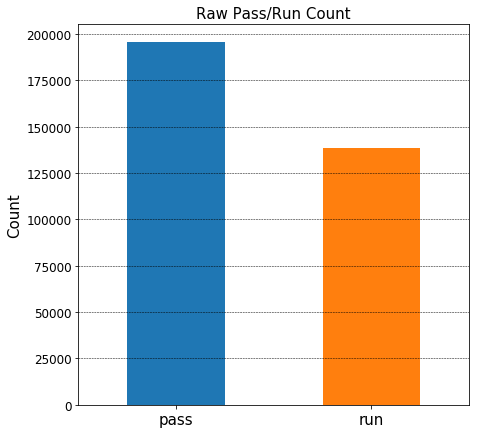

In [3]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
df_final['play_type'].value_counts().plot(ax=ax, kind='bar')
ax.yaxis.grid(which='major', linestyle='--', linewidth='0.5', color='black')
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('Count', fontsize=15)
ax.xaxis.set_tick_params(rotation=0, labelsize=15)
ax.set_title('Raw Pass/Run Count', fontsize=15);

Adding quarters to the mix makes the plot a little more informative. When normalized over the total number of plays in that particular quarter we can see the following trends: 

1. The difference in pass/run plays is more pronounced in Q2 and Q4, 
2. Q1 is when the teams are most conservative where preference of running over passing is the most over other quarters. 

We can make sense of this because by the end of Q2, teams are playing for maximizing the score before the game resets and the possession changes, and by the end of Q4, teams are essentially playing for the game

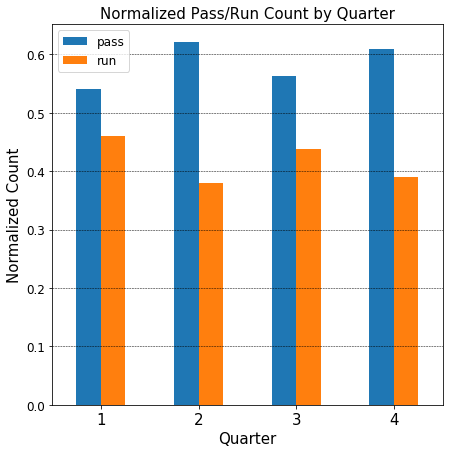

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)

df_final.groupby('qtr')['play_type'].value_counts(normalize=True).to_frame().unstack().plot(ax=ax, kind='bar')
ax.grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='black')
ax.legend(['pass', "run"], loc = 'upper left', prop={'size': 12});

ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('Normalized Count', fontsize=15)
ax.xaxis.set_tick_params(rotation=0, labelsize=15)
ax.set_xlabel('Quarter', fontsize=15)
ax.set_title('Normalized Pass/Run Count by Quarter', fontsize=15);

Let us check another degree of variabilty - the play down. For this purpose, we need to plot both the raw as well as normalized data

1. Overall number of 4th down plays is much lower than others, 
2. This is because of punt plays on 4th down

When we compare run vs pass normalized: 

1. teams are more likely to go for a pass play on 3rd downs compared to any other down 
2. On 1st downs in fact teams are slightly more likely to run more than to pass. 
3. From Q1-Q3 the pass likelihood consistently increases (and run likelihood decreases), 
4. For Q4, the trend reverses on 4th down. 

This will be highlighted when we segment out the quarters from this result in the next plot

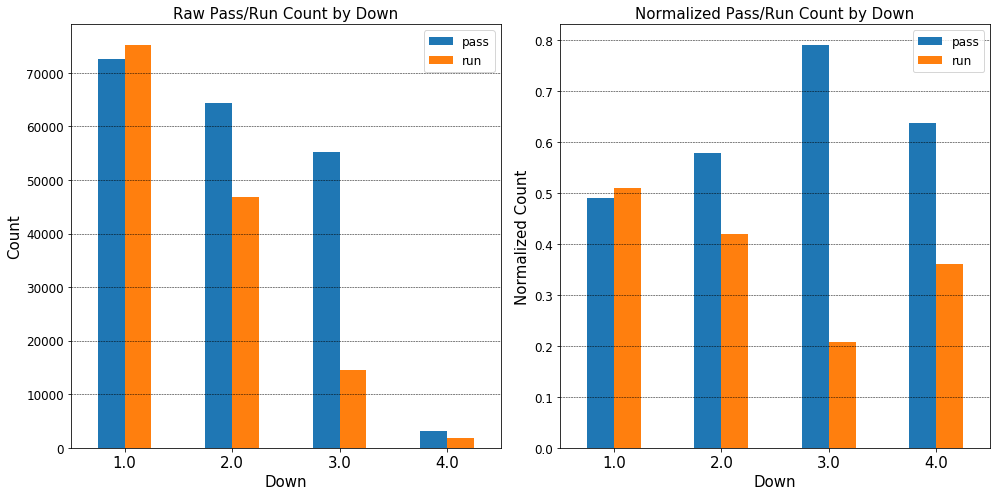

In [5]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(14)

df_final.groupby('down')['play_type'].value_counts().to_frame().unstack().plot(ax=ax[0], kind='bar')
ax[0].grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='black')
ax[0].legend(['pass', "run"], loc = 'upper right', prop={'size': 12});
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].xaxis.set_tick_params(rotation=0, labelsize=15)
ax[0].set_xlabel('Down', fontsize=15)
ax[0].set_title('Raw Pass/Run Count by Down', fontsize=15);

df_final.groupby('down')['play_type'].value_counts(normalize=True).to_frame().unstack().plot(ax=ax[1], kind='bar')
ax[1].grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='black')
ax[1].legend(['pass', "run"], loc = 'upper right', prop={'size': 12});
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].set_ylabel('Normalized Count', fontsize=15)
ax[1].xaxis.set_tick_params(rotation=0, labelsize=15)
ax[1].set_xlabel('Down', fontsize=15)
ax[1].set_title('Normalized Pass/Run Count by Down', fontsize=15);

plt.tight_layout()

Let us segment the results by both quarters and downs. For this purpose we will look at only normalized results for simplicity

For Q1-3, the behavior is in sync with what we saw as an overall behavior in the previous plot i.e: Tendency to pass (over run) increases for down 1-3 and decreases on down 4 - and the run tendency shows an opposite trend. This behavior does not hold during Q4, where we see consistently decreasing or increasing trends. 

We can explain this with the followgin hypothesis: In Q1 through Q3, teams are willing to risk making a play on 4th down only when it is a short yardage situation which they can execute possibly via a short run or a QB sneak. In Q4, only teams which are trailing are willing to risk making a play on 4th down and at that point, the yards to go don't really matter, because they are playing for the game. We will explore this further when we segment yardage along with Quarters and downs

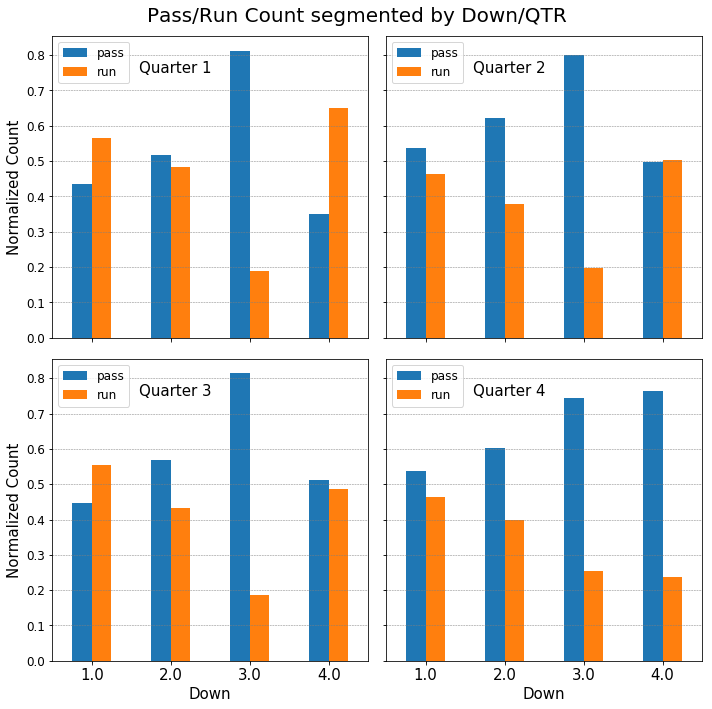

In [6]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(10)

for i, axis in enumerate(ax.reshape(-1)):
    df_final[df_final['qtr']==i+1].groupby('down')['play_type'].value_counts(normalize=True).to_frame().unstack().plot(ax=axis, kind='bar')
    axis.grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='grey')
    axis.text(0.6,0.75, 'Quarter ' + str(i+1), fontsize=15)
    axis.legend(['pass', "run"], loc = 'upper left', prop={'size': 12})
    axis.yaxis.set_tick_params(labelsize=12)
    axis.set_ylabel('Normalized Count', fontsize=15)
    axis.xaxis.set_tick_params(rotation=0, labelsize=15)
    axis.set_xlabel('Down', fontsize=15)

fig.suptitle('Pass/Run Count segmented by Down/QTR', fontsize=20)     
plt.tight_layout()
plt.subplots_adjust(top=0.94)

When we plot the distribution function of number of pass/run plays everything which was discussed using the previous 3 plots comes together:

1. On 1st down, for all quarters the distribution is concentrated around 10 yards, because 1st and 10 will be the most common situation. For Q1 and Q1 we see a tendency to run over pass and the other way round for Q2 and Q4
2. On 2nd down, the distribution separates out a bit, where tendency to pass is higher the tendency to run except for short yardage situations
3. On 3rd down, this is where we see the tendency to pass completely dominate the tendency to run. except only on very short yardage(<2 yards) situations where tendency is more to run.
4. On 4th down, as expected, from Q1-Q3, instances with a "short run" plays are most common, whereas in Q4, the tendency to pass is higher compared to run, even for a short yardage situation

C:\Users\vpmodak\Desktop\Work\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


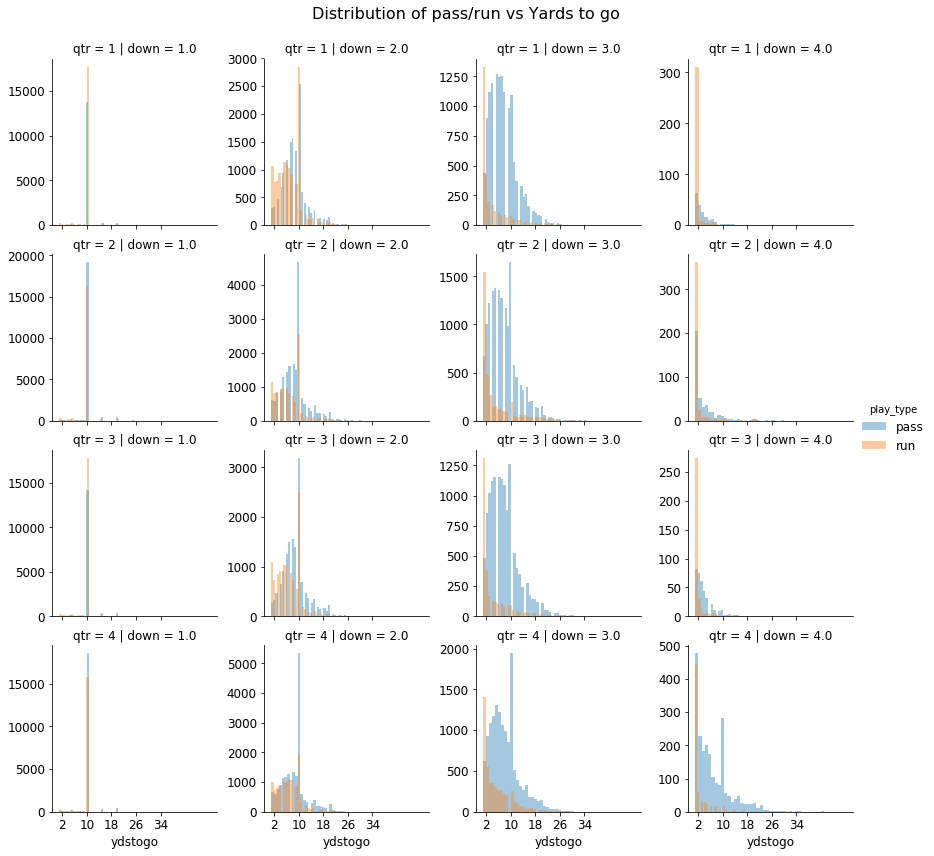

In [7]:
g = sns.FacetGrid(df_final, row="qtr", col="down", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g = (g.map(sns.distplot, "ydstogo", kde=False).set(xticks=list(np.arange(2,42,8))).add_legend(fontsize=12))
g.set_titles(size=12)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12) 
g.fig.suptitle("Distribution of pass/run vs Yards to go", size=16)
g.fig.subplots_adjust(top=.92)    

Adopting a similar approach we can explore the effect of score differential over pass vs run plays. For this purpose we will plot only the normalized distributions as the actual number of plays do not add value to the investigation. Furthermore, Segmentation by "down" was found to be redundant and hence not shown here

1. We can see that from Q1-Q3, both the run and pass distributions are centered around a value of zero.
2. In Q4 though, the distributions are definitely separated, where pass plays average around a -ve score differential and run plays average around a positive score differential.

In other words, in Q4, pass plays are more likely to come from the team which is trailing and run plays are more likely to come from the team which is leading.

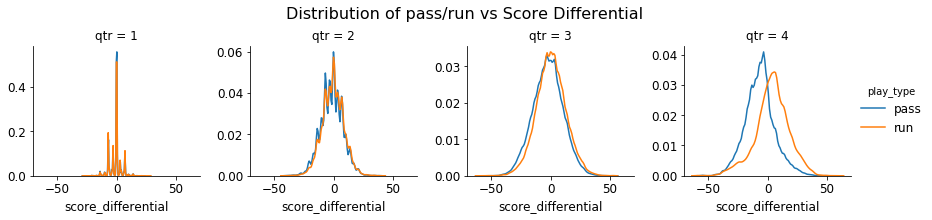

In [8]:
g = sns.FacetGrid(df_final, col="qtr", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g = (g.map(sns.distplot, "score_differential", kde=True, hist=False).add_legend(fontsize=12))
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g.fig.suptitle("Distribution of pass/run vs Score Differential", size=16)
g.fig.subplots_adjust(top=.8)  

We can explore this further by segmenting out pass vs run tendency for teams which are trailing and leading. This time we will revert back to histograms which are not normalized since we in this case we do care about the actual number of pass/run plays.

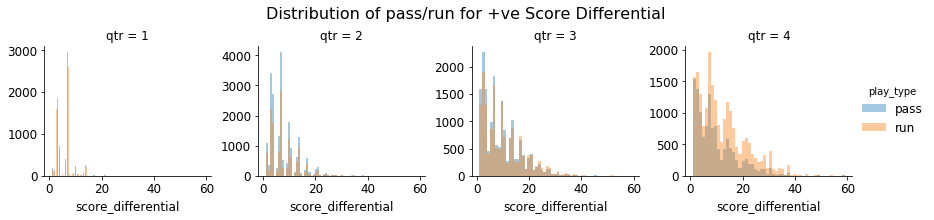

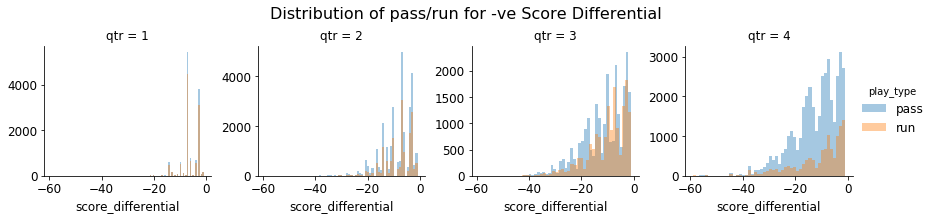

In [9]:
df_final_pos = df_final[df_final['score_differential']>0]
g = sns.FacetGrid(df_final_pos, col="qtr", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g = (g.map(sns.distplot, "score_differential", kde=False).add_legend(fontsize=12))
g.set_titles(size=12)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g.fig.suptitle("Distribution of pass/run for +ve Score Differential", size=16)
g.fig.subplots_adjust(top=.8)  


df_final_neg = df_final[df_final['score_differential']<0]
g1 = sns.FacetGrid(df_final_neg, col="qtr", hue = "play_type", hue_order = ['pass','run'], 
                  sharey=False)
g1 = (g1.map(sns.distplot, "score_differential", kde=False).add_legend(fontsize=12))
g1.set_titles(size=12)
for ax in g1.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g1.fig.suptitle("Distribution of pass/run for -ve Score Differential", size=16)
g1.fig.subplots_adjust(top=.8)  


Next we move on to time-outs remaining. Intuitively, we expect that we will see a higher proportion of pass plays when there are no timeouts remaining - because of the possibility of either a long play or stopping the clock. In this case, we will look at only normalized bar charts. Not only do we see that our hypothesis is confirmed, but we also see a consistent increase in the proportion of pass plays as teams use their timeouts. Segmentation with respect to quarter is possible but does not add any further value

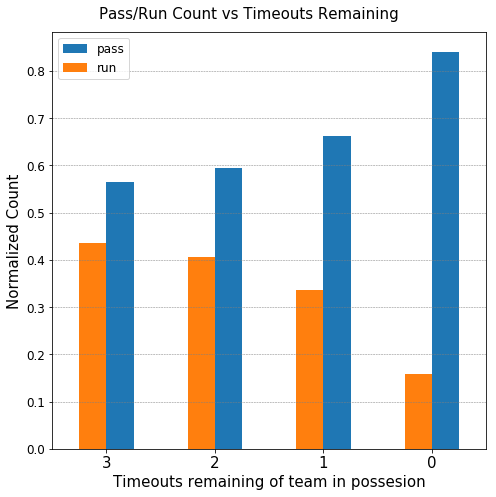

In [10]:
fig, axis = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)

df_final.groupby('posteam_timeouts_remaining')['play_type'].value_counts(normalize=True).to_frame().unstack().plot(ax=axis, kind='bar')
axis.grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='grey')
axis.legend(['pass', "run"], loc = 'upper left', fontsize=12);
axis.invert_xaxis()

axis.yaxis.set_tick_params(labelsize=12)
axis.set_ylabel('Normalized Count', fontsize=15)
axis.xaxis.set_tick_params(rotation=0, labelsize=15)
axis.set_xlabel('Timeouts remaining of team in possesion', fontsize=15)

fig.suptitle('Pass/Run Count vs Timeouts Remaining', fontsize=15)     
plt.tight_layout()
plt.subplots_adjust(top=0.93)

Now we move on to more abstract variables where the dependence may not be intuitive or obvious. Let's look at the yards to goal from the point of the play. We can notice the following things:

1. For down 1 to 3, regardless of the quarter, there isnt much difference betweem pass vs run. And the distribution is widest between 70-80 yards - i.e. that's where most of the plays happen
2. However 4th down plays happen closer to the goal - which signifies that teams will be willing to take a risk on 4th down, only if they are close enough the goal line, which is expected
3. On down 4, we also see a sort of a bimodal distribution, indicating that there are regions in the field where teams are willing to take a chance on 4th down
4. In Q2 and Q4 on 4th down there is a very slight preference of pass over run, if the spot is further away from goal



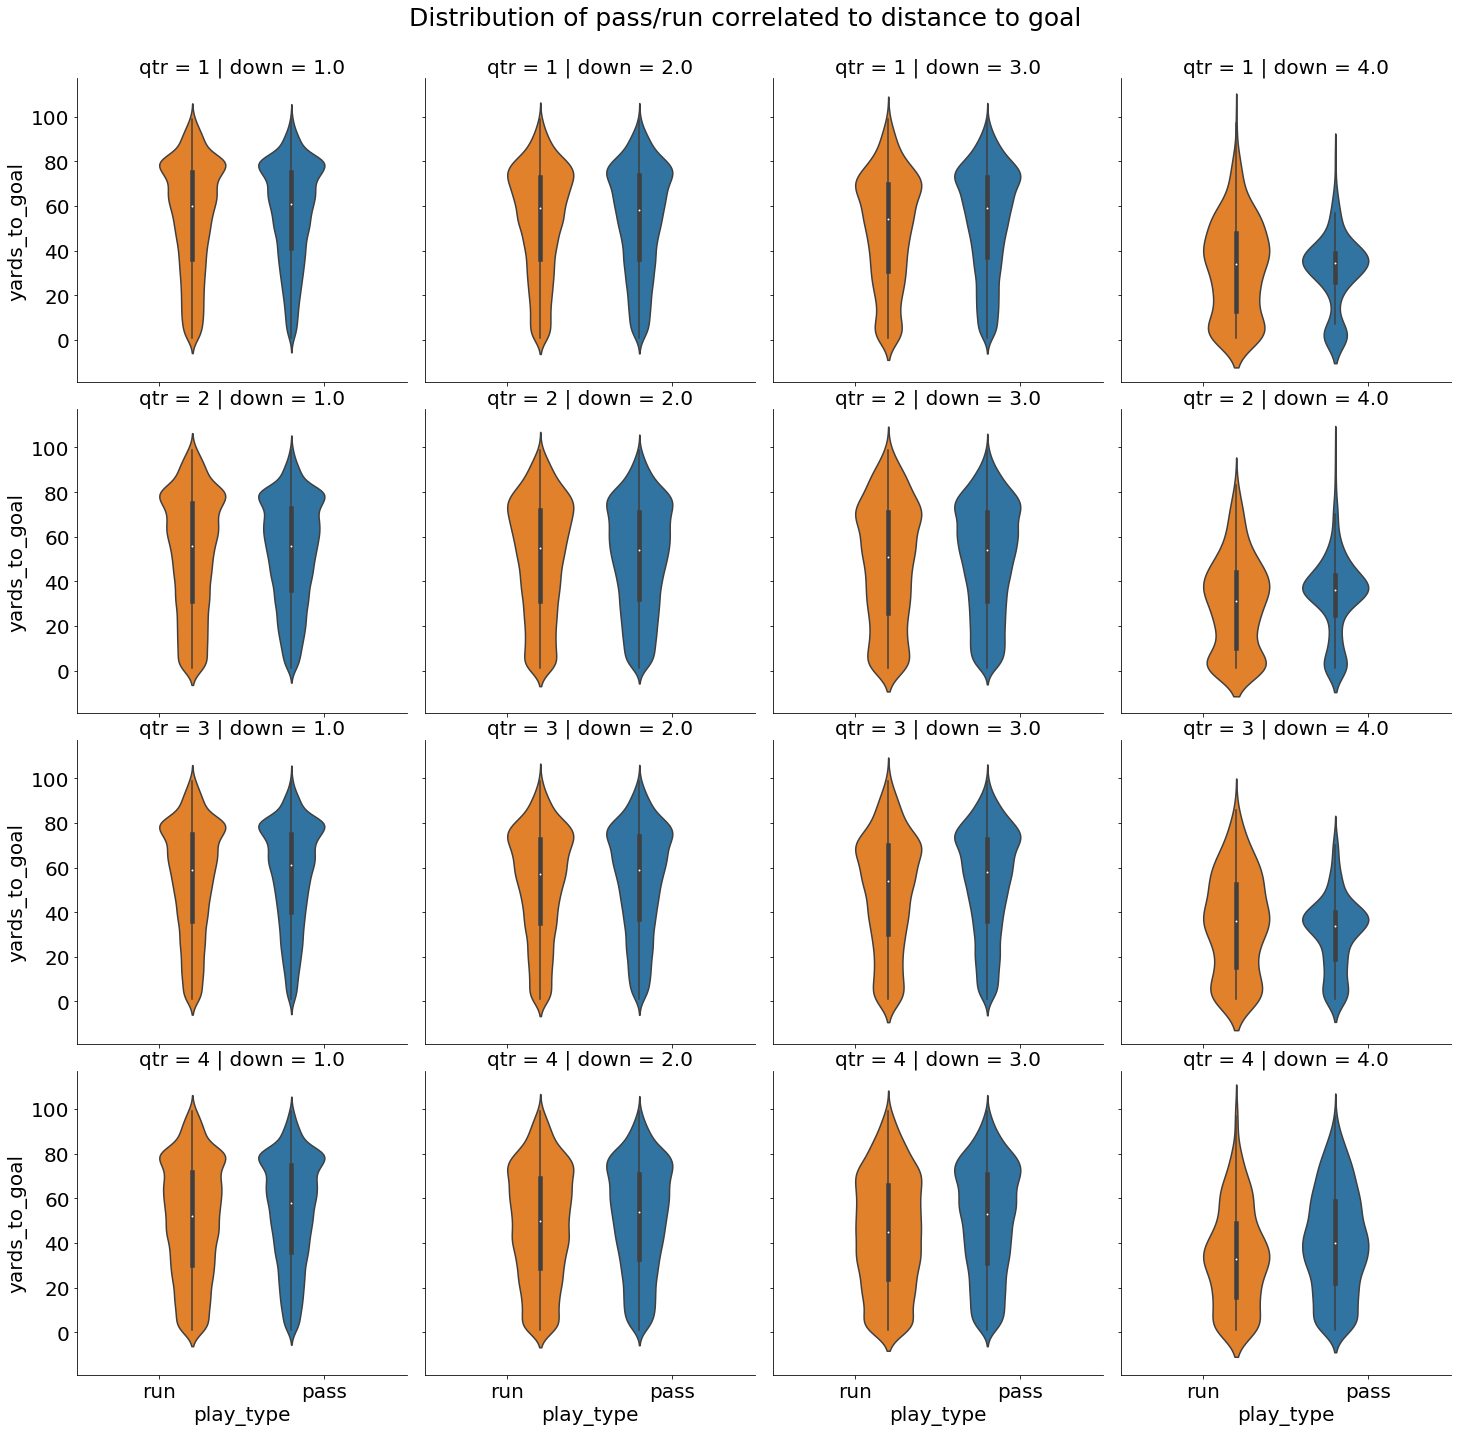

In [11]:
g = sns.catplot(x="play_type", y="yards_to_goal", 
                row = "qtr", col="down",
                hue="play_type", hue_order = ['pass', 'run'],
                data=df_final, kind="violin")
g.set_titles(size=20)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=20)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=20) 
g.fig.suptitle("Distribution of pass/run correlated to distance to goal", size=25)
g.fig.subplots_adjust(top=.93)

We can then look at the pass and run performance of the team until the point of the play. By and large, we do not see trends which pop out - and the overall preference of the teams is to pass over run. However, we do see for Q4, if the teams have a strong run performance, then there is a marginally higher tendency to run over pass. Though, this might be because that particular team has a positive score differential and will therefore prefer run plays. 

We can try an plot this as a scatter, but there is significant overlap between points which prevents us from drawing any conclusions.

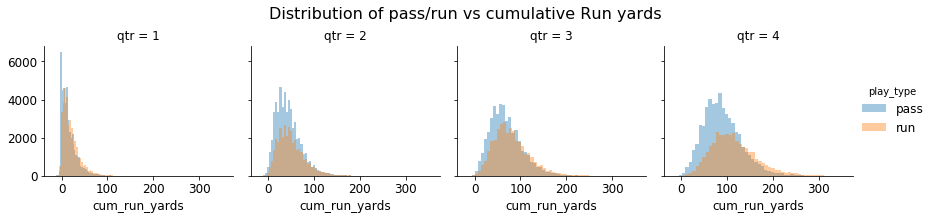

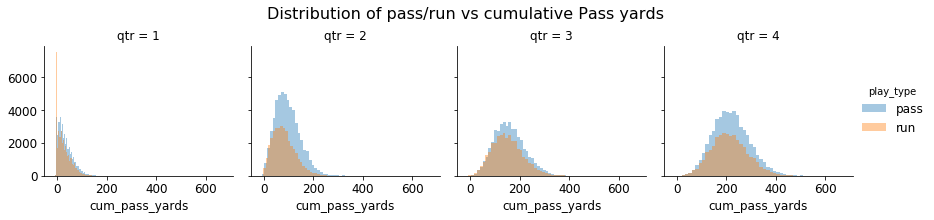

In [12]:
g = sns.FacetGrid(df_final, col = 'qtr', hue = "play_type", hue_order = ['pass','run'])
g = (g.map(sns.distplot, "cum_run_yards", kde=False).add_legend(fontsize=12))
g.set_titles(size=12)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g.fig.suptitle("Distribution of pass/run vs cumulative Run yards", size=16)
g.fig.subplots_adjust(top=.8)  

g1 = sns.FacetGrid(df_final, col = 'qtr', hue = "play_type", hue_order = ['pass','run'])
g1 = (g1.map(sns.distplot, "cum_pass_yards", kde=False).add_legend(fontsize=12))
g1.set_titles(size=12)
for ax in g1.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g1.fig.suptitle("Distribution of pass/run vs cumulative Pass yards", size=16)
g1.fig.subplots_adjust(top=.8)

Finally we will look at teams' run vs pass preference as a function of their dual threat rating. This was calculated separately as highlighed in the report on data wrangling. Dual threat rating is a percentile based number from 0 to 1 where 1 indicates the strongest threat of a QB run and 0 indicates the weakest threat of a QB run

Overall whether a team passes or runs more, does have a strong independent correlation to the team's dual threat rating. Toward down 3 and down 4, there is a very slight "skew" toward running the ball more if the team has a dual threat QB, but this does not take into account other parameters which were explored earlier, especially the yardage

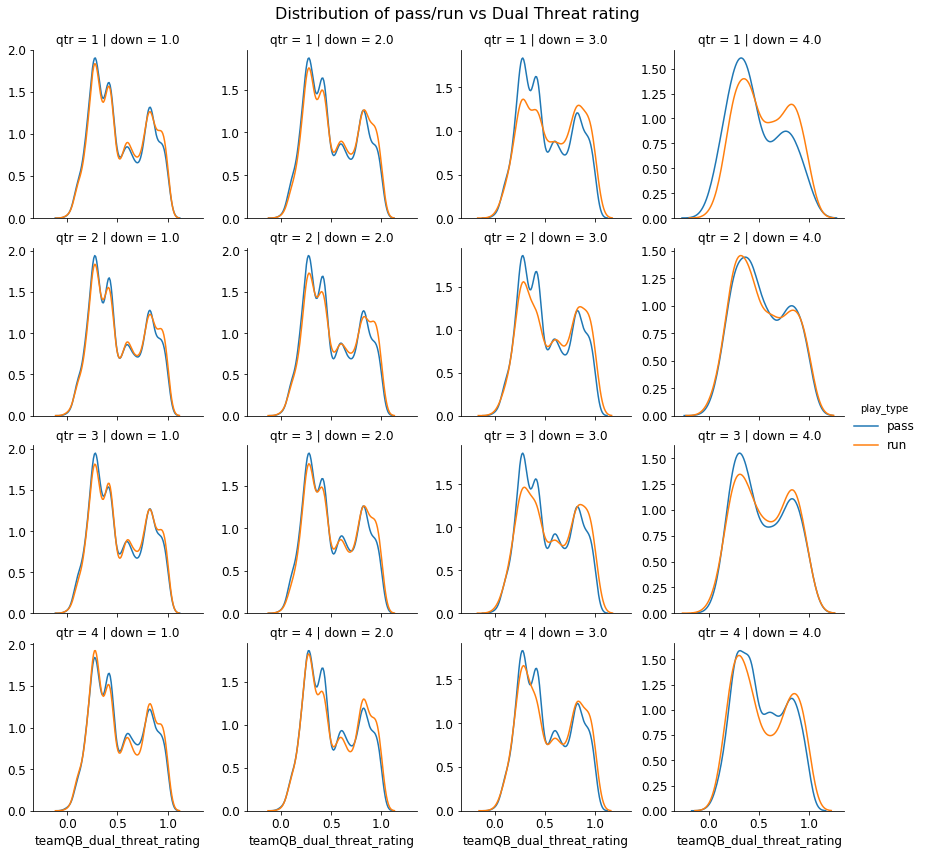

In [13]:
df_final['dual_threat_product'] = df_final['teamQB_dual_threat_rating'] * df_final['ydstogo']
g = sns.FacetGrid(df_final, col = 'down', row = 'qtr', hue = "play_type", hue_order = ['pass','run'], sharey=False)
g = (g.map(sns.distplot, "teamQB_dual_threat_rating", hist=False).add_legend(fontsize=12))
g.set_titles(size=12)
for ax in g.axes.flat:
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_title(ax.get_title(), fontsize=12)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
g.fig.suptitle("Distribution of pass/run vs Dual Threat rating", size=16)
g.fig.subplots_adjust(top=.93) 

# Summary

Multiple variables were studied to identify what decides a team's decision to pass or run the ball, and the following conclusions can be drawn from the data analysis:

1. Between Down 1-4, 3rd downs are when the teams are most likely to go for a passing play
2. As far as quarters go, Q1 is when teams are most conservative and prefer to run the ball the most. Q2 and Q4 is when teams are more likely to pass the ball
3. As far as yardage is considered, teams prefer to exclusively pass on 3rd and 4th down - run plays do happen but only on very short yardage situations
4. Teams are more likely to run the ball if the score difference is positive and more likely to pass if it is negative
5. The tendency of teams to pass increases (and that to run decreases) consistently as they start using timeouts
6. No strong direct correlation between pass vs run with respect to distance from goal. However, 4th down plays happen if the spot is within specific areas of the field. And there is a very slight prefernce to pass on 4th down, in Q2 and Q4, if you are further away from goal
7. No effect of previous performance in the game on pass vs run play - may be a slight preference to run if run performance is strong, but other factors such as scores, yardage and field position not taken into consideration here
8. On down 3 and 4, the teams have slightly higher tendency to run the ball if they have dual threat quarterbacks than if they don't. But once again, other pertinent factors are not considered

Throughout this analysis, not more than 3 factors where considered. However, all factors will be used for training a model to predict whether a play is a pass or a run.